In [1]:
import editdistance as ed
import numpy as np
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tqdm import tqdm_notebook

In [4]:
LEN = 31

In [5]:
with open("../../data/SlO_10/SlO1_R1_spacers_10.txt") as f:
    lines_10 = [x[:LEN] for x in f.readlines()][1::2]

In [6]:
with open("../../data/SlO_10/SlO1_R1_spacers_10.txt") as f:
    lines_10 = [x[:LEN] for x in f.readlines()][1::2]

In [7]:
len(lines)

NameError: name 'lines' is not defined

In [8]:
with open("../../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    pairs_10 = [[y[:LEN] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [9]:
with open("../../data/SlO_15/SlO1_R1_pairs_15.txt") as f:
    pairs_15 = [[y[:LEN] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [10]:
len(pairs_10)

54734

In [11]:
len(pairs_15)

11061

In [13]:
pairs_10[:2]

[['GCCTGACATTGCAGACGTTACAAATTGAGAG', 'TGTGTCGGAGTATGCGGGCTGATTTTCGTCT'],
 ['CTGTTTTCGCAAATCTATGGACTATTGCTAT', 'GGACGCACGGAATACAAAGCCGTGTATCTGC']]

In [8]:
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])

In [14]:
from collections import Counter, OrderedDict

In [18]:
counter = Counter(lines)
ord_dict = OrderedDict()

In [19]:
lines = []
for p in pairs_10:
    lines.append(p[0])
    lines.append(p[1])

In [30]:
len(lines)

109468

In [20]:
u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

In [21]:
args_s = np.argsort(counts)[::-1]

In [22]:
for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [23]:
sp_to_n = {}

In [24]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1, -1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [25]:
od = OrderedDict({"aaa" : 10, "acb" : 3, "aac" : 1, "xyc" : 1})

In [26]:
def squash(od, t, verbose =False):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in tqdm_notebook(od.items()):
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
            min_ed, answ_item = find_closest(answ, init_item[0], t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                if verbose: print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                if verbose: print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [27]:
squash(od, 3, True)

A Jupyter Widget

new spacer: aaa 10
add: acb to aaa 13
add: aac to aaa 14
new spacer: xyc 1



(OrderedDict([('aaa', 14), ('xyc', 1)]),
 {'aaa': 0, 'acb': 0, 'aac': 0, 'xyc': 1})

In [28]:
nd, sp_to_n = squash(ord_dict, 6)

A Jupyter Widget

new spacer: GGGCGCACGGAATACAAAGCCGTGTATCTGC 4822



In [31]:
len(lines)

109468

In [33]:
cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

In [34]:
sorted(cl_to_n.keys())[:10]

['AAAAAACAAAACAAAAAACAAAGCCCCAGCC',
 'AAAAAAGCAGGCTTTACTGCGGCACGTCTTT',
 'AAAAAATGATGCTGTATTTCACTATTGGGTT',
 'AAAACAGAACAAAATTATCTGCTCGATAGTT',
 'AAAACCAAACTTCTCCATAAATTCCATAGCC',
 'AAAACCCAGCTTGTACTGAAAATGATAGACG',
 'AAAATGGCCATGGGCAAGGATAGGATTGACG',
 'AAAATTCATATTGATAAACACCGCGTTTGTA',
 'AAACAGATTGTTCGTTTTCCCCATATTCATG',
 'AAACCTGATACCCGCCCTTGTGATC']

In [35]:
len(cl_to_n)

2054

In [36]:
with open("../../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    pairs = [[y[:LEN] for y in x[:-2].split(' ')] for x in f.readlines()]

In [37]:
len(pairs)
pairs[0]

['GCCTGACATTGCAGACGTTACAAATTGAGAG', 'TGTGTCGGAGTATGCGGGCTGATTTTCGTCT']

In [38]:
def process_pair(pair, cl_to_num, t = 6):
    try:
        return [cl_to_n[find_closest(cl_to_num, pair[0], t)[1][0]], cl_to_n[find_closest(cl_to_num, pair[1], t)[1][0]]]
    except:
        return [-1, -1]

In [39]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1, -1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [40]:
find_closest(cl_to_n, 'AATTTCGGATGCCCCCGGAATTGCGC', 20)[1][0]

'AATTGCGGATGCTCCCGGAATTGCGCGGGCA'

In [41]:
process_pair(pairs[18],cl_to_n)

[1179, 4]

In [ ]:
pairs_n = [process_pair(p, cl_to_n) for p in tqdm_notebook(pairs)]

A Jupyter Widget

In [29]:
pairs_n[18]

[1163, 5]

In [30]:
graph = np.zeros((1800,1800))

err = 0
for p in pairs_n:
    if len(p) == 2 and sum(p) != -2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

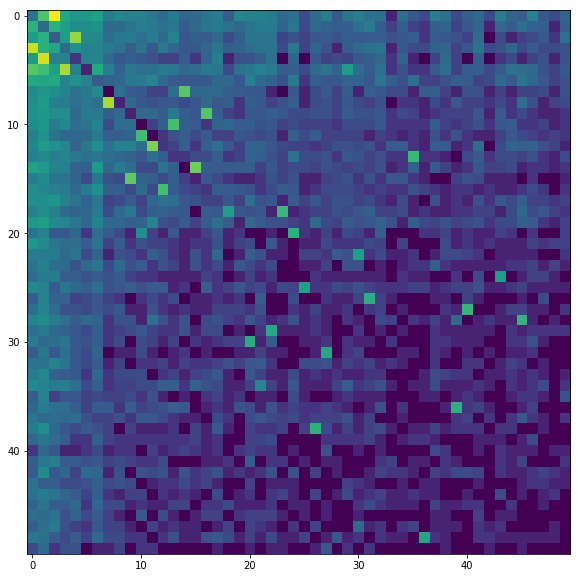

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(graph+1)[:50,:50])
plt.show()

In [33]:
graph_list = [x.tolist() for x in graph.astype(int)[:, :]]

In [32]:
np.save("../data/graphs/SlO_22", graph)

In [36]:
import pickle

In [37]:
pickle.dump(nd, open("../data/dicts/SlO_counts_22", 'wb'))
pickle.dump(sp_to_n, open("../data/dicts/SlO_sp_to_n_22", 'wb'))


In [175]:
import networkx as nx

In [176]:
def to_graph(gr, edges_num):
    G=nx.DiGraph()
    G.add_nodes_from(np.arange(gr.shape[0]))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        #gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

In [177]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

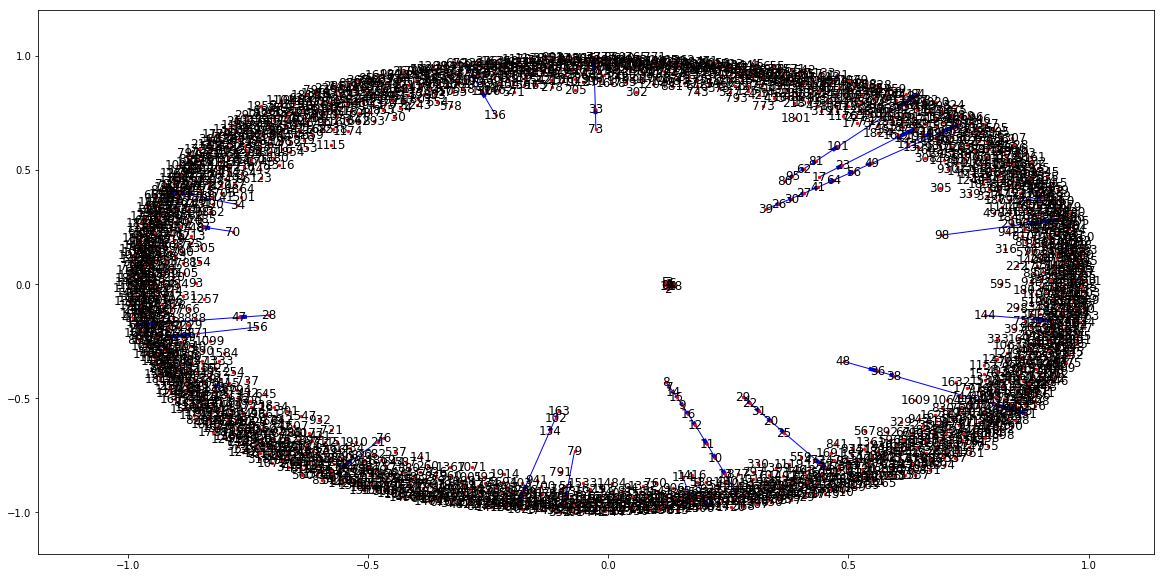

In [178]:

pairs, G = to_graph(graph, 68)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=5)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()

In [47]:
gr.shape

(1917, 1917)

In [61]:
graph_norm = (graph) / (graph.sum(1) + 1).reshape(-1, 1)

# CHAIN WALKER

In [57]:
def plot_gr(gr, t, log = False, s=10, l = 0):
    plt.figure(figsize=(s,s))
    if log:
        plt.imshow(np.log(gr[l:t,l:t] + 1))
    else:
        plt.imshow(gr[l:t,l:t])
    plt.colorbar()
    #plt.xticks(np.arange(l,t))
    #plt.yticks(np.arange(l,t))
    plt.show()

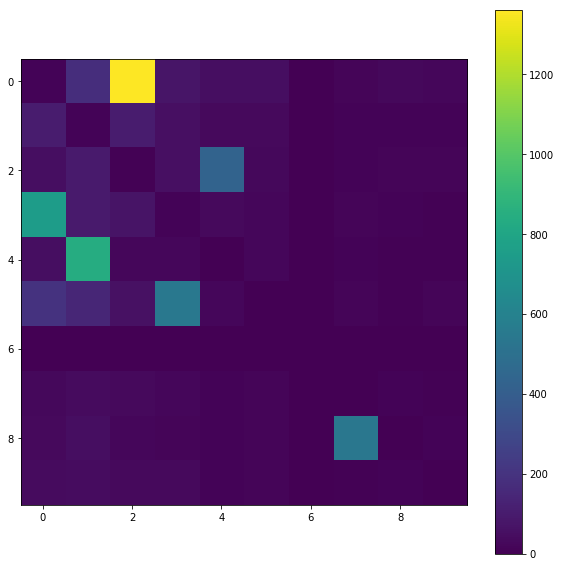

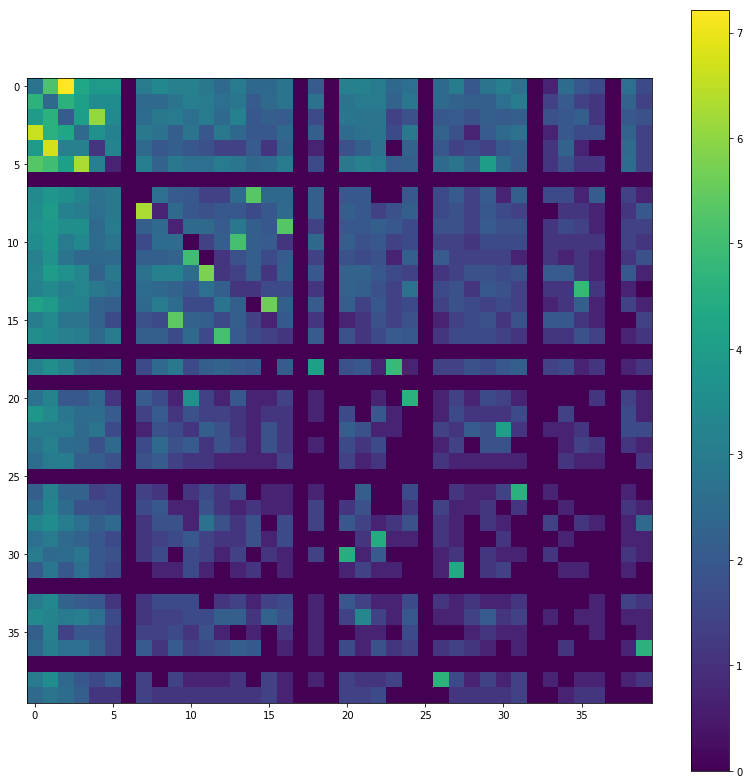

In [85]:
plot_gr(graph, 10, False, 10, l = 0) 
plot_gr(graph, 40, True, 14, l = 0) 

In [62]:
gr = graph
grn = graph_norm

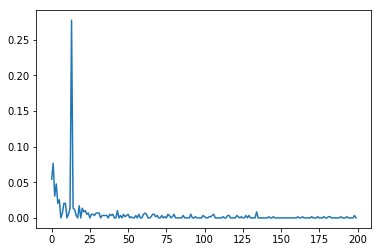

In [167]:
plt.plot(grn[10][:200])
plt.show()

In [76]:
gr[11]

array([106.,  11., 102., ...,   0.,   0.,   0.])

In [75]:
grn.sum(1).astype(int)

array([0.99961686, 0.99907834, 0.99916667, ..., 0.        , 0.        ,
       0.        ])

In [78]:
terminate_vertexes = set(np.arange(1800)[gr.sum(1).astype(int) <= 10])

In [43]:
148 in terminate_vertexes

False

In [79]:
len(terminate_vertexes)

1624

In [45]:
import tqdm

In [86]:
# Way 1 
visited = dict()

all_cass = {}
cassette_num = 0 
for v in tqdm_notebook(range(1800)):
#     print(all_cass)
#     print("--")
    if v not in visited.keys():            
        cassette = []
        save_cassette = cassette_num
        while not v in terminate_vertexes and not v in cassette:                 
            cassette.append(v)
            #if cassette[0] == 148:
            #    tqdm.tqdm.write(" ".join([str(x) for x in cassette]))
            v = np.argmax(gr[v][6:])
            if v in visited.keys():
                save_cassette = visited[v]
            #tqdm.tqdm.write(str(v))
            visited[v] = save_cassette
        cassette.append(v)
        #if len(cassette) != 0 : 
        #    print(cassette)

        all_cass[cassette_num] = cassette
        
        cassette = []
        cassette_num += 1
        

A Jupyter Widget

In [145]:
grn[148].argmax()

261

In [87]:
[x for x in all_cass.values() if len(x) > 1]

[[0, 2, 7, 8, 1, 151],
 [3, 1, 151],
 [4, 16, 6],
 [5, 23, 51],
 [9, 10, 7, 8, 1, 151],
 [11, 4, 16, 6],
 [12, 5, 23, 51],
 [13, 29, 16, 6],
 [14, 9, 10, 7, 8, 1, 151],
 [15, 3, 1, 151],
 [18, 17],
 [20, 18, 17],
 [21, 56],
 [22, 24, 37],
 [26, 25],
 [27, 34, 85],
 [28, 39, 123],
 [30, 14, 9, 10, 7, 8, 1, 151],
 [31, 21, 56],
 [33, 71],
 [35, 5, 23, 51],
 [36, 33, 71],
 [38, 20, 18, 17],
 [40, 60, 61, 94, 168],
 [43, 44],
 [45, 62, 152],
 [47, 103, 240],
 [48, 30, 14, 9, 10, 7, 8, 1, 151],
 [49, 97, 15, 3, 1, 151],
 [50, 73, 15, 3, 1, 151],
 [52, 58],
 [54, 24, 37],
 [55, 43, 44],
 [57, 2, 7, 8, 1, 151],
 [59, 2, 7, 8, 1, 151],
 [64, 120, 106, 219],
 [65, 93, 125],
 [66, 49, 97, 15, 3, 1, 151],
 [67, 66, 49, 97, 15, 3, 1, 151],
 [68, 42],
 [69, 118, 156],
 [72, 48, 30, 14, 9, 10, 7, 8, 1, 151],
 [74, 27, 34, 85],
 [76, 139, 32],
 [77, 7, 8, 1, 151],
 [79, 54, 24, 37],
 [80, 25],
 [86, 46],
 [91, 2, 7, 8, 1, 151],
 [96, 59, 2, 7, 8, 1, 151],
 [99, 24, 37],
 [100, 105, 87],
 [104, 70],
 

In [200]:
mask = gr.argmax(1) == 6

In [201]:
np.array([x for x in nd.values()])[mask]

array([51, 43, 45, 38, 35, 23, 19, 15, 16, 12, 13,  7,  9,  5,  5,  3,  3,
        3,  2,  2,  2,  3,  1,  3,  1,  2,  1,  1,  3,  1,  1,  1,  1])

## Compare with DB

In [40]:
with open("../data/CRISPR_db_2109.txt") as f:
    db = f.read().splitlines()

In [41]:
db_split = [[y[:LEN] for y in x.split("\t")[1:] if len(y) > 0] for x in tqdm_notebook(db)]

A Jupyter Widget

In [42]:
db_f = [[find_closest(cl_to_n, y, 6)[1][1] for y in x] for x in tqdm_notebook(db_split)]

A Jupyter Widget

In [191]:
terminate_vertexes = {}

In [43]:
def process_vertex_pure(v, gr, visited_keys, mask, max_len = 10):           
    cassette = []
    cassette.append(v)
    while not v in cassette[:-1] and len(cassette) < max_len: 
        row = np.copy(gr[v])
        row[np.logical_not(mask)] = 0
        
        v = np.argmax(row)
        print(v)
        cassette.append(v)
        visited.add(v)
        
    return cassette

In [275]:
mask = [True]*grn.shape[0]

In [308]:
18 in visited

False

In [312]:
visited = set()
process_vertex_pure(18, grn, visited, mask, 20)

18


[18, 18]

In [311]:
mask = [not x in visited for x in range(grn.shape[0])]

In [62]:
[x for x in db_f if a_in_b([68, 48, 36], x)]

[[28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36, 375, 290, 545, 380],
 [28, 594, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 68, 48, 36, 290, 554, 545, 380, 1726, 805],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 594, 45, 97, 323, 68, 48, 36],
 [28, 

In [56]:
[x for x in db_f if a_in_b([6], x)]

[]

In [45]:
def a_in_b(a,b):
    a = np.array(a)
    b = np.array(b)
    if len(a) > len(b):
        return False
    else:
        for i in range(len(b) - len(a) + 1):
            if all(b[i:i + len(a)] == a):
                return True
    return False

In [255]:
a_in_b(np.array([1,2,3,4]), np.array([1,2,3,4]))

[1 2 3 4]


True

In [260]:
a_in_b([0, 2, 4], [660, 461, 660])

[660 461 660]


False

In [163]:
check = lambda x, y : y[0] in x and y[1] in x

for cassette in cassettes_as_list:
    if len(cassette) >= 2:
        answ = [x for x in db_f if check(x, cassette[:2])]
        if len(answ) > 0 :
            print("Cass:", cassette)
            print(answ)

Cass: [  0   2   7   8   1 151  -1  -1  -1  -1]
[[5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4], [5, 3, 0, 2, 4], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 611, -1, 932, 1184, 629, 29, 22, -1, 30, 20, 521, 1038, 111, -1, 549, 1401, -1, 1015, 1035, -1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 67], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1], [5, 3, 0, 2, 4, 1, 617, 

Cass: [54 24 37 -1 -1 -1 -1 -1 -1 -1]
[[5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 3, 29, 22, 30, 20, 24, 50, 521, 1038, 111, 79, 60, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [611, 629, 29, 30, 20, 24, 43, 50, 521, 1038, -1, -1, 60, 67, 72, 54], [5, 3, 29, 22, 30, 20, 24, 43, 79, 60, 54], [5, 3, 0, 2, 4, 611, -1, 932, 1184, 629, 29, 22, -1, 30, 20, 24, 1401, 1015, 1139, -1, -1, -1, 67, -1, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 29, 22, 30, 20, 24, 43, 50, 79, 60, 67, 72, 54], [5, 3, 29, 22, 30, 20, 24, 50, 521, 1038, 111, 79, 60, 54], [611, 629, 29, 30, 20, 24, 43, 

In [161]:
[x for x in db_f if 124 in x and 61 in x]

[[124,
  61,
  100,
  111,
  47,
  109,
  141,
  236,
  116,
  118,
  162,
  180,
  128,
  222,
  104,
  76,
  145,
  134,
  105,
  93,
  131,
  120,
  112,
  248,
  313,
  981,
  -1,
  -1],
 [124, 61, 100, 1033, 365, 827, 180, 722, 491, 405, 612, 1222],
 [124,
  61,
  100,
  365,
  468,
  -1,
  398,
  487,
  827,
  404,
  162,
  180,
  162,
  180,
  405,
  612,
  1222],
 [124, 61, 100, 1033, 468, 1222],
 [124,
  61,
  100,
  1033,
  365,
  468,
  -1,
  398,
  487,
  827,
  404,
  683,
  141,
  236,
  116,
  118,
  162,
  -1,
  491,
  405,
  612,
  1222],
 [124,
  61,
  100,
  111,
  47,
  109,
  141,
  236,
  1252,
  693,
  975,
  995,
  1608,
  891,
  700,
  509,
  634,
  -1,
  -1],
 [124, 61],
 [124, 61, 100, 1033, 405],
 [124,
  61,
  118,
  93,
  131,
  120,
  112,
  121,
  201,
  602,
  248,
  313,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [124, 61, 100, 1222, 47, -1, 126, 1323, -1, -1, -1, -1],
 [124,
  61,
  100,
  1033,
  365,
  468,
  487,
  404,
  162,
  162,
  180,
  722,
  491

In [118]:
max_cassete_len = max([len(x) for x in all_cass.values() if len(x) > 1])
cassettes = np.vstack([np.array(x + [-1]*(max_cassete_len - len(x))) for x in all_cass.values() if len(x) > 1])

In [164]:
np.where(cassettes_as_list == 11)

(array([5]), array([0]))

In [165]:
cassettes_as_list[5]

array([11,  4, 16,  6, -1, -1, -1, -1, -1, -1])

In [138]:
print(n_to_clust[105])
print(n_to_clust[111])

GTTACGCTGCCTGAATATCGCA
GCTGGTTTTGAATCGTCCCGCG


In [97]:
find_closest(cl_to_n, db_split[0][3], 6)

(0, ('TACGTGAAGAATATTTGCAACA', 461))

In [102]:
db_split[0]

['AACATCGGAAACGGCTTCGCGG',
 'TACGTGAAGAATATTTGCAACA',
 'AACATCGGAAACGGCTTCGCGG',
 'TACGTGAAGAATATTTGCAACA',
 'GGCATAGCCAGGCTGATCCGGC',
 'GCCCGCCTCGTCGGTGTATTCC',
 'AACGCATAGACGGGAAAAGTCT',
 'GGATTGTGGCATCAGGTGATAT',
 'ACTGTCATCTCTCTCCCACTGG',
 'GAAACTCTCTGAGAATCCGTCA',
 'CCCTTGAATGCGTTCAAAAGGT',
 'TTTAACAGCCTGGCTACTCAGG',
 'TCGGTGCAAACGAAAACCGGAA',
 'AGCTCCCCGATGTGGCAGTTAA',
 'TCTGGTGCCGCCAAATCATTTC',
 'GCTTCGGTGCATTCATCTATTT']

In [58]:
find_closest(cl_to_n, 'AACATCGGAAACGGCTTCGCGGCGGCGGAT'[:LEN], 50)

(1, ('AACATCGGAAACGGATTCGCGG', 660))

In [25]:
db_set = set()

for c in db_split:
    for sp in c:
        db_set.add(sp)


In [26]:
db_dict = dict(zip(list(sorted(db_set)), np.arange(len(db_set))))

In [27]:
lens = [find_closest(db_dict, sp, 30)[0] for sp in tqdm_notebook(cl_to_n.keys())]

A Jupyter Widget

In [28]:
mask = (np.array(lens) <= 6)

In [34]:
good_clusters = set(np.array([x for x in cl_to_n.keys()])[mask])

In [36]:
cl_to_n_backup = dict(cl_to_n)

In [38]:
cl_to_n = dict(zip(sorted(list(good_clusters)), [cl_to_n[x] for x in sorted(list(good_clusters))]))

In [150]:
sum([x for x in nd.values()])

109468

In [151]:
sum([x[1] for x in nd.items() if x[0] in good_clusters])

78957

In [42]:
sum([x for x in cl_to_n_backup.values()])

1619100

In [44]:
len(set(cl_to_n.keys()).intersection(good_clusters))

573